<a href="https://colab.research.google.com/github/chrislevn/Deep-Learning-Journey/blob/master/SignalTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'1.15.0'

In [ ]:
!pip install tensorflow-gpu==2.0.rc

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 4.3MB 51.2MB/s 
     |████████████████████████████████| 501kB 37.4MB/s 


In [ ]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [ ]:
pwd

'/content/drive/My Drive/ML'

In [ ]:
ls

NgocNet.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=740c76d8bbddeab3e3dd9a67c861088d7166d89fa0baedb85511107e032e247f
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train["features"]
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
trainX[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

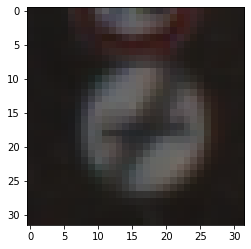

In [ ]:
plt.imshow(trainX[0])

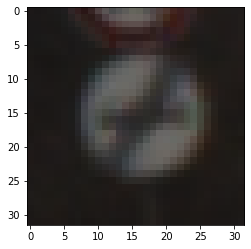

In [ ]:
plt.imshow(trainX[1])

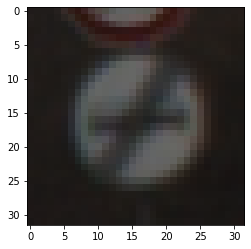

In [ ]:
plt.imshow(trainX[10])

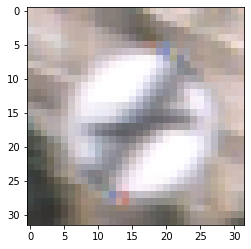

In [ ]:
plt.imshow(trainX[50])

In [ ]:
trainY[50]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

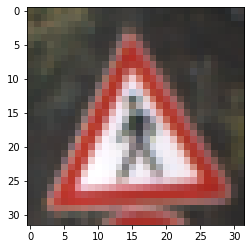

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Pedestrians'

In [ ]:
validX = valid["features"]
validY = valid["labels"]

In [ ]:
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0


In [ ]:
# 255
# 1
trainX[0]

array([[[0.33333333, 0.31764706, 0.22352941],
        [0.29411765, 0.29411765, 0.21960784],
        [0.27058824, 0.29411765, 0.21568627],
        ...,
        [0.15686275, 0.16862745, 0.17647059],
        [0.23921569, 0.24705882, 0.25882353],
        [0.24705882, 0.23529412, 0.23529412]],

       [[0.30196078, 0.28235294, 0.19607843],
        [0.25490196, 0.25098039, 0.19607843],
        [0.30980392, 0.30196078, 0.23137255],
        ...,
        [0.15294118, 0.16078431, 0.16078431],
        [0.19607843, 0.21176471, 0.21960784],
        [0.21568627, 0.21568627, 0.22352941]],

       [[0.4       , 0.36470588, 0.27843137],
        [0.33333333, 0.29803922, 0.23137255],
        [0.41568627, 0.36078431, 0.28235294],
        ...,
        [0.16862745, 0.16862745, 0.16078431],
        [0.16078431, 0.16078431, 0.15686275],
        [0.16078431, 0.16078431, 0.16862745]],

       ...,

       [[0.23529412, 0.22352941, 0.22352941],
        [0.24313725, 0.23921569, 0.22352941],
        [0.33333333, 0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
# epoch
# Steps
# 
batch_size = 64


In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
543/543 [==============================] - 53s 97ms/step - loss: 1.8073 - accuracy: 0.4716 - val_loss: 1.5831 - val_accuracy: 0.5435
Epoch 2/10
 57/543 [==>...........................] - ETA: 43s - loss: 0.9454 - accuracy: 0.7001

In [ ]:
saved_model = tf.keras.models.load_model("ngocnet.h5")

In [ ]:
result = saved_model.predict(testX[100:101])

In [ ]:
result

array([[1.33641846e-02, 9.39560950e-01, 1.32024870e-03, 6.96030656e-06,
        2.32059602e-02, 3.63303581e-04, 1.11269519e-05, 8.43169726e-03,
        1.20685222e-02, 7.19389072e-06, 1.31472200e-06, 1.00772713e-05,
        4.81597199e-05, 2.51553691e-04, 1.47656510e-05, 1.49451822e-04,
        2.13876501e-05, 8.64656826e-08, 9.30621754e-05, 6.08168084e-05,
        1.80258103e-05, 5.74159321e-06, 3.55515513e-05, 9.78377466e-06,
        9.50720350e-05, 8.64832109e-05, 5.98433944e-05, 2.53585022e-05,
        1.38177302e-05, 3.43363217e-06, 9.02136605e-07, 2.83101798e-07,
        1.96385427e-05, 1.41188648e-04, 1.80130592e-05, 1.52846493e-04,
        6.99512975e-06, 2.17472352e-05, 1.12217596e-04, 6.99317525e-06,
        1.53100336e-04, 5.02668763e-06, 1.70137264e-05]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Speed limit (30km/h)'

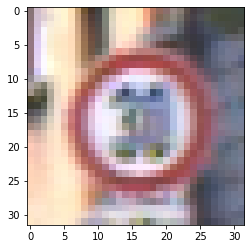

In [ ]:
plt.imshow(test["features"][100])